In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install imutils
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from skimage import feature #
from imutils import build_montages
from imutils import paths
import numpy as np
import cv2
import os
import pickle 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
def quantify_image(image):
    features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    return features


In [7]:
def load_split(path):
    imagePaths = list(paths.list_images(path))
    data = [] 
    labels = []
    for imagePath in imagePaths:   
        label = imagePath.split(os.path.sep)[-2]
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold (image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features=quantify_image(image)
        data.append(features)
        labels.append(label)
    return (np.array(data), np.array(labels))

In [11]:
trainingPathSpiral = r"/content/drive/MyDrive/COLAB/Parkinsons/dataset/spiral/training"
testingPathSpiral = r"/content/drive/MyDrive/COLAB/Parkinsons/dataset/spiral/testing"
(X_trainSpiral, y_trainSpiral) = load_split(trainingPathSpiral)
(X_testSpiral, y_testSpiral) = load_split(testingPathSpiral)

In [12]:
trainingPathWave = r"/content/drive/MyDrive/COLAB/Parkinsons/dataset/wave/training"
testingPathWave = r"/content/drive/MyDrive/COLAB/Parkinsons/dataset/wave/testing"
(X_trainWave, y_trainWave) = load_split(trainingPathWave)
(X_testWave, y_testWave) = load_split(testingPathWave)

In [13]:
le=LabelEncoder()
y_trainSpiral = le.fit_transform (y_trainSpiral) 
y_testSpiral = le.transform (y_testSpiral) 
print (X_trainSpiral. shape, y_trainSpiral.shape)

(72, 12996) (72,)


In [14]:
le=LabelEncoder()
y_trainWave = le.fit_transform (y_trainWave) 
y_testWave = le.transform (y_testWave) 
print (X_trainWave. shape, y_trainWave.shape)

(72, 12996) (72,)


In [15]:
from sklearn.model_selection import cross_val_score
modelsf = RandomForestClassifier (n_estimators=100) 
scores = cross_val_score(modelsf, X_trainSpiral, y_trainSpiral, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.07


In [16]:
modelwf = RandomForestClassifier (n_estimators=100) 
scores = cross_val_score(modelwf, X_trainWave, y_trainWave, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.67 accuracy with a standard deviation of 0.05


In [17]:
from sklearn import svm
modelsvms = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(modelsvms, X_trainSpiral, y_trainSpiral, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.08


In [18]:
modelsvmw = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(modelsvmw, X_trainWave, y_trainWave, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.14


In [19]:
modelknns = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(modelknns, X_trainSpiral, y_trainSpiral, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.07


In [20]:
modelknnw = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(modelknnw, X_trainWave, y_trainWave, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.13


In [21]:
from sklearn.linear_model import LogisticRegression
modellrw = LogisticRegression(solver='liblinear', random_state=0)
scores = cross_val_score(modellrw, X_trainWave, y_trainWave, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.16


In [22]:
modellrs = LogisticRegression(solver='liblinear', random_state=0)
scores = cross_val_score(modellrs, X_trainSpiral, y_trainSpiral, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.10


In [23]:
from sklearn import tree
modeldts = tree.DecisionTreeClassifier()
scores = cross_val_score(modeldts, X_trainSpiral, y_trainSpiral, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.58 accuracy with a standard deviation of 0.09


In [24]:
modeldtw = tree.DecisionTreeClassifier()
scores = cross_val_score(modeldtw, X_trainWave, y_trainWave, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.65 accuracy with a standard deviation of 0.11


In [25]:
print("[INFO] training model") 
modelsf = RandomForestClassifier (n_estimators=100) 
modelsf.fit(X_trainSpiral, y_trainSpiral)

[INFO] training model


RandomForestClassifier()

In [26]:
print("[INFO] training model") 
modelsvmw = svm.SVC(kernel='linear', C=1, random_state=42)
modelsvmw.fit(X_trainWave, y_trainWave)

[INFO] training model


SVC(C=1, kernel='linear', random_state=42)

In [27]:
testingPathSpirals = list(paths.list_images(testingPathSpiral))
idxss = np.arange(0, len (testingPathSpirals))
idxss = np.random.choice (idxss, size=(25,), replace=False)
simages=[]

In [28]:
testingPathWaves = list(paths.list_images(testingPathWave))
idxsw = np.arange(0, len (testingPathWaves))
idxsw = np.random.choice (idxsw, size=(25,), replace=False)
wimages=[]

In [29]:
for i in idxss:
    simage = cv2.imread(testingPathSpirals[i])
    soutput = simage.copy()
    soutput = cv2.resize(soutput, (128, 128))
    simage = cv2.cvtColor(simage, cv2.COLOR_BGR2GRAY)
    simage = cv2.resize(simage, (200, 200))
    simage = cv2.threshold (simage, 0, 255,cv2.THRESH_BINARY_INV | cv2. THRESH_OTSU) [1]

In [30]:
for i in idxsw:
    wimage = cv2.imread(testingPathWaves[i])
    woutput = wimage.copy()
    woutput = cv2.resize(woutput, (128, 128))
    wimage = cv2.cvtColor(wimage, cv2.COLOR_BGR2GRAY)
    wimage = cv2.resize(wimage, (200, 200))
    wimage = cv2.threshold (wimage, 0, 255,cv2.THRESH_BINARY_INV | cv2. THRESH_OTSU) [1]

In [31]:
sfeatures = quantify_image(simage)
spreds = modelsf.predict([sfeatures])
slabel =le.inverse_transform(spreds)[0]
scolor = (0, 255, 0) if slabel == "healthy" else (0, 0, 255)
cv2.putText(soutput,slabel, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, scolor, 2)
simages.append(soutput)

In [32]:
wfeatures = quantify_image(wimage)
wpreds = modelsvmw.predict([wfeatures])
wlabel =le.inverse_transform(wpreds)[0]
wcolor = (0, 255, 0) if wlabel == "healthy" else (0, 0, 255)
cv2.putText(woutput, wlabel, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, wcolor, 2)
wimages.append(woutput)

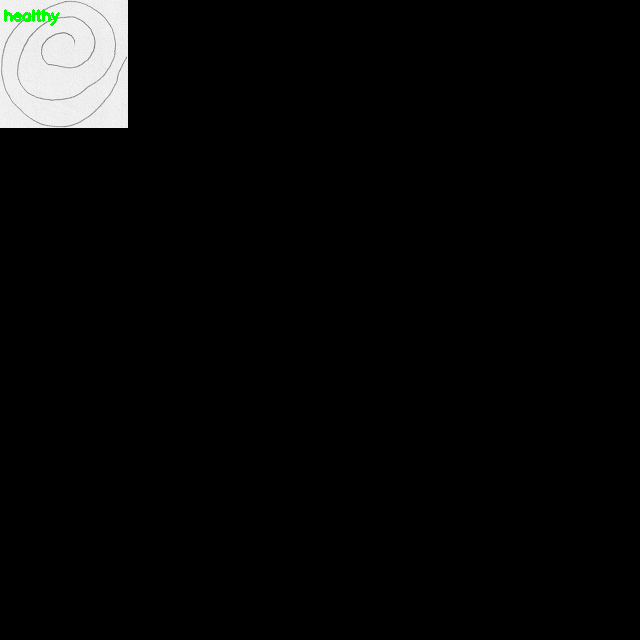

-1

In [33]:
from google.colab.patches import cv2_imshow
montage = build_montages (simages, (128, 128), (5, 5))[0]
cv2_imshow(montage) 
cv2.waitKey(0)

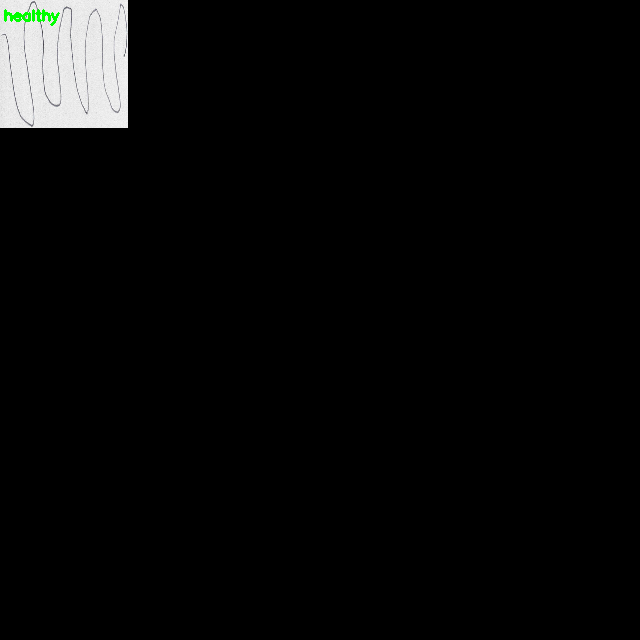

-1

In [34]:
montage = build_montages (wimages, (128, 128), (5, 5))[0]
cv2_imshow( montage) 
cv2.waitKey(0)

In [35]:
spredictions = modelsf.predict(X_testSpiral) 

In [36]:
predictions = modelsvmw.predict(X_testWave) 

In [37]:
cms = confusion_matrix(y_testSpiral, spredictions). flatten() 
print(cms)
(tn, fp, fn, tp) = cms
accuracy= (tp + tn) / float(cms.sum()) 
print (accuracy)

[14  1  3 12]
0.8666666666666667


In [38]:
cmw = confusion_matrix(y_testWave, predictions). flatten() 
print(cmw)
(tn, fp, fn, tp) = cmw
accuracy= (tp + tn) / float(cmw.sum()) 
print (accuracy)

[12  3  5 10]
0.7333333333333333


In [39]:
pickle.dump (modelsf, open ('/content/drive/MyDrive/COLAB/Parkinsons/parkinsonSpiral.pkl', 'wb'))

In [40]:
pickle.dump (modelsvmw, open ('/content/drive/MyDrive/COLAB/Parkinsons/parkinsonWave.pkl', 'wb'))